In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# read in data

# source: https://www.kaggle.com/datasets/samithsachidanandan/the-global-ai-ml-data-science-salary-for-2025

df = pd.read_csv('data/salaries.csv')
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,88584.000000,8.858400e+04,88584.000000,88584.000000
mean,2024.034758,1.619323e+05,157567.798417,21.286011
std,0.620370,1.965317e+05,73531.373158,40.831018
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,106097.250000,0.000000
50%,2024.000000,1.470000e+05,146307.000000,0.000000
75%,2024.000000,1.995000e+05,198600.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [4]:
print('Number of missing values by column:')
print(df.isna().sum())

Number of missing values by column:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [5]:
print(df.head())

   work_year experience_level employment_type                 job_title  \
0       2025               MI              FT  Customer Success Manager   
1       2025               SE              FT                  Engineer   
2       2025               SE              FT                  Engineer   
3       2025               SE              FT         Applied Scientist   
4       2025               SE              FT         Applied Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   57000             EUR          60000                 NL            50   
1  165000             USD         165000                 US             0   
2  109000             USD         109000                 US             0   
3  294000             USD         294000                 US             0   
4  137600             USD         137600                 US             0   

  company_location company_size  
0               NL            L  
1               US

The salaries dataset is comprised of roughly 88,000 records with 11 columns. None of the columns have missing values, which makes the cleaning step of the dataset much easier. The dataset has only four numeric fields: work_year, salary, salary_in_usd, and remote_ratio. Many of the dataset's text fields seem to be categorical, such as experience_level, employment_type, company_size, and worksite.

salary_usd seems like it would make a good column to predict based on the given data. Predicting the salary would indicate a regression problem rather than a classification or clustering problem.

In [6]:
# data cleaning
exp_level_abbr = {'EN': 'Entry-level', 'MI': 'Mid-level', 'SE': 'Senior-level', 'EX': 'Executive'}
df['experience_level'] = df['experience_level'].map(exp_level_abbr)

comp_size_abbr = {'S': 'Small', 'M': 'Medium', 'L': 'Large'}
df['company_size'] = df['company_size'].map(comp_size_abbr)

emp_type_abbr = {'PT': 'Part-time', 'FT': 'Full-time', 'CT': 'Contract', 'FL': 'Freelance'}
df['employment_type'] = df['employment_type'].map(emp_type_abbr)

remote_ratio_map = {0: 'In-person', 50: 'Hybrid', 100: 'Remote'}
df['worksite'] = df['remote_ratio'].map(remote_ratio_map)
del df['remote_ratio']

df['experience_level'] = pd.Categorical(df['experience_level'], categories=['Entry-level', 'Mid-level', 'Senior-level', 'Executive'], ordered=True)
df['company_size'] = pd.Categorical(df['company_size'], categories=['Small', 'Medium', 'Large'], ordered=True)
df['worksite'] = pd.Categorical(df['worksite'], categories=['In-person', 'Hybrid', 'Remote'], ordered=True)

Based on information from observing the data and from the data source on Kaggle, many of the columns are ordinal. I modified the dataframe to properly represent these relationships. The data in the experience_level, company_size, and employment_type columns was renamed to a more human-readable format. The remote_ratio column, though numeric, only had three distinct values: 0, 50, and 100. The author of the dataset said that these numbers represented in-person, hybrid, and remote worksites, resspectively. I updated the column to be ordinal text categroies as opposed to the numeric values that already existed. I also made experience_level and company_size ordinal as well.

In [7]:
df[['employee_residence', 'salary_in_usd']].groupby('employee_residence').median('salary_in_usd').sort_values('salary_in_usd', ascending=False).round().head(10)

,salary_in_usd
employee_residence,
QA,300000.0
VE,192500.0
US,151700.0
SA,150000.0
PR,145200.0
CN,125404.0
NZ,124318.0
CH,123819.0
LB,122500.0


The five top earning countries based on median salary (in USD) appear to be Qatar, Venezuela, the United States, South Africa, and Puerto Rico. With the exception of Venezuela, this information makes reasonable sense.

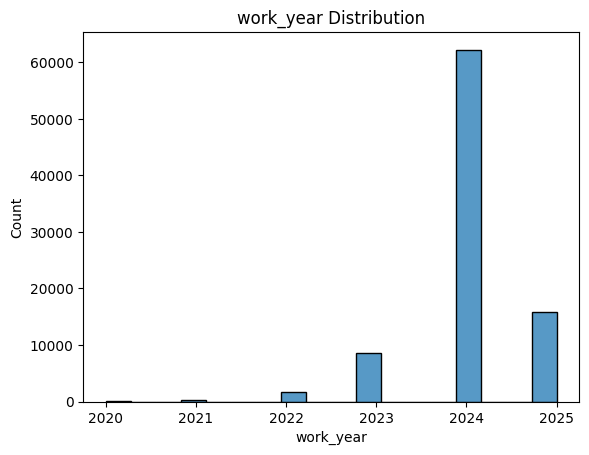

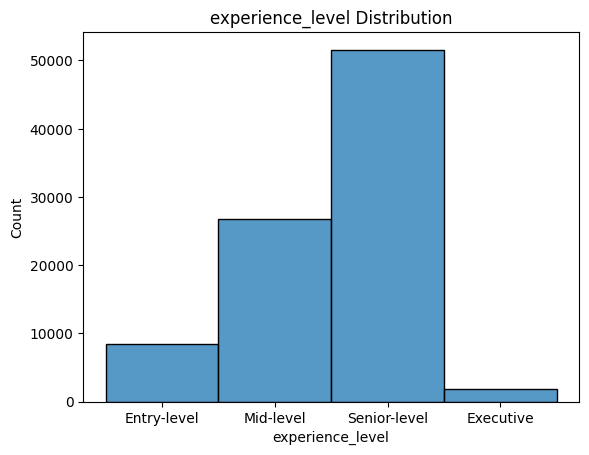

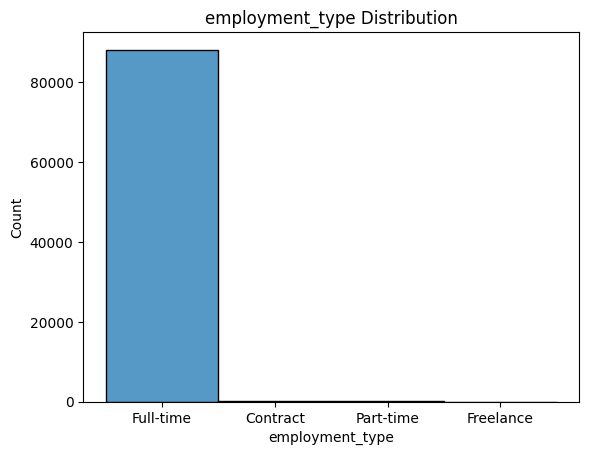

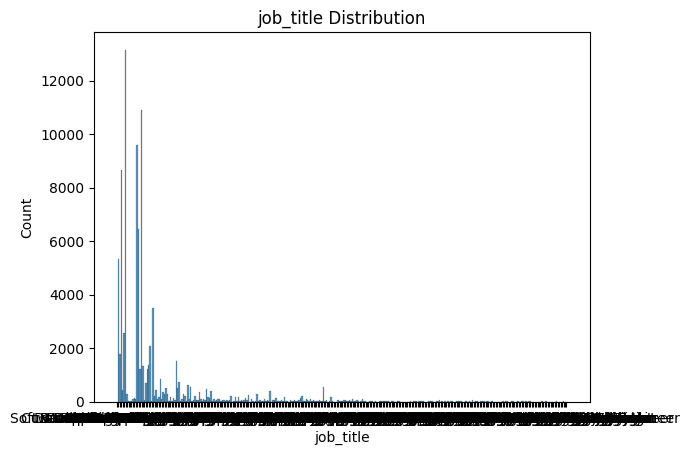

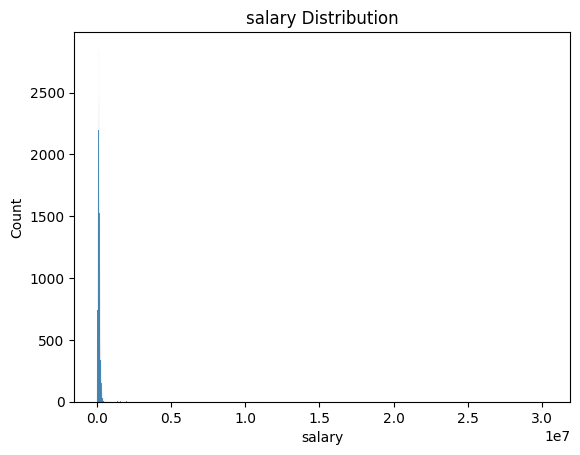

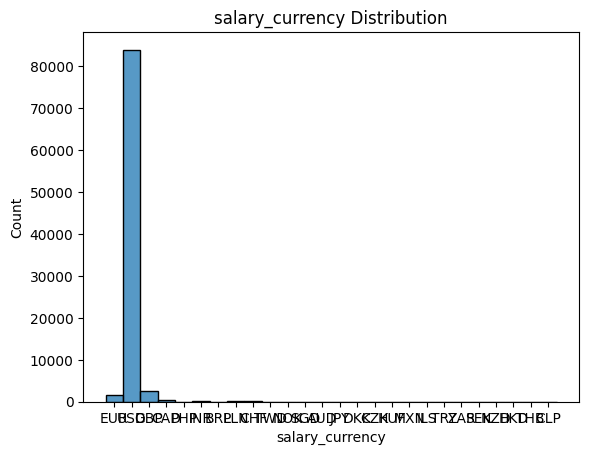

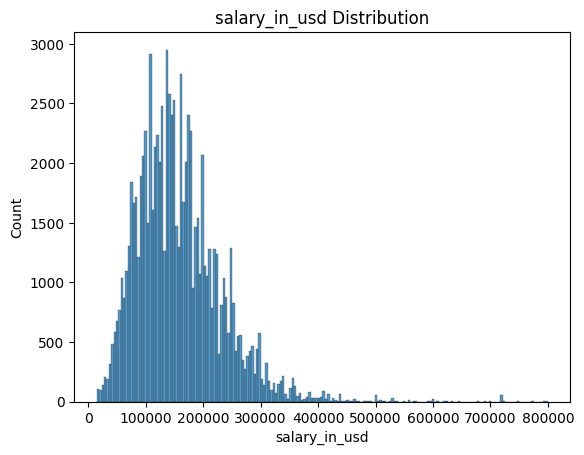

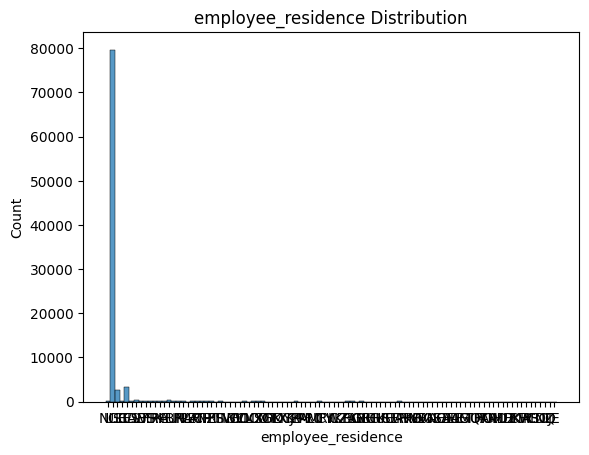

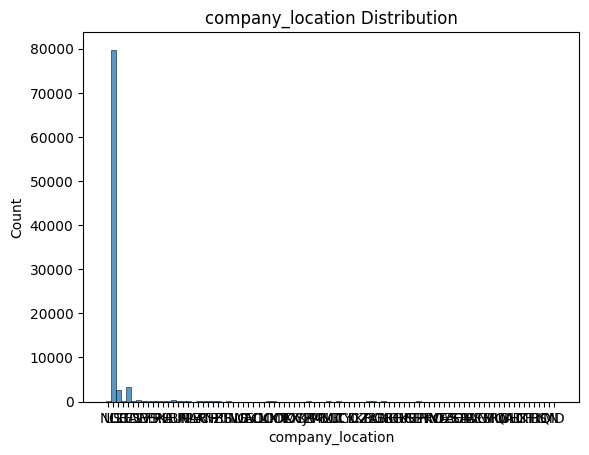

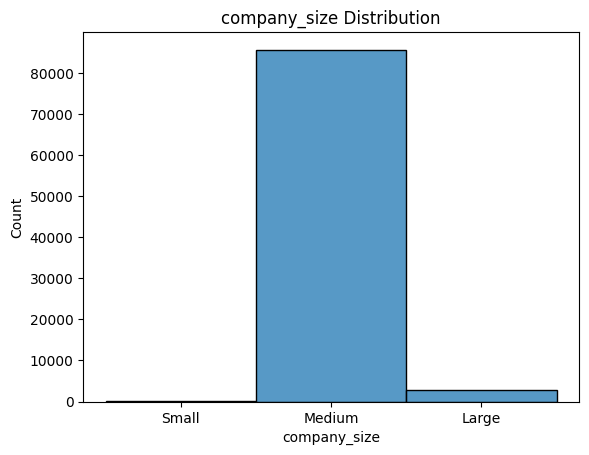

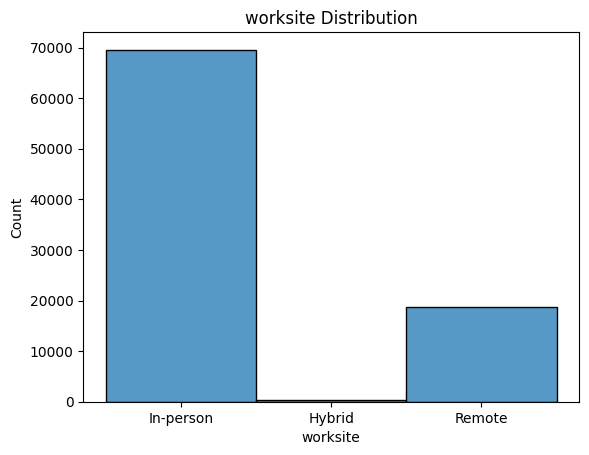

In [8]:
for col in df.columns:
    plot = sns.histplot(data=df, x=col)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Looping through each column in the dataset proved to yield some valuable information. Since a majority of the data is numeric or categorical, most features were able to make nice histograms. Here are some interesting observations made from each column's histogram:

- work_year: the data ranges from 2020-2025, indicating that the data has been recently collected. 2024 had the most records by far, which makes sense because it has only been 2025 for three months.

- experience_level: the data is ordinal, with a little over half the records being senior-level positions. This indicates that the average salary in this dataset will be a little higher than the national average because the data is skewed towards senior-level positions.

- employment_type: almost all the roles in the dataset are full-time positions.

- job_title: this histogram is very messy. There are too many columns to see the data properly on the x-axis. This means that this data is likely a free text field. The field may still hold valuable information with a little bit more cleaning, but it's too early to tell.

- salary: this data is almost all grouped by the 0, but it is very hard to see due to the range of the x-axis. There is some outlier at the 3 million mark. This column represents salaries in a variety of currenciesm meaning it will be difficult to compare records based on this column.

- salary_in_usd: much better than salary. All the salaries have been converted to USD. The curve peaks roughly around 130k, which makes sense. The data is slighly skewed right, but still looks very normally distributed.

- employee_residence: a bunch of two-letter country codes. US makes up the majority of the data (though it is hard to see based off the histogram).

- company_location: similar to employee_residence, a bunch of two-letter country codeswith US making up the majority.

- company_size: an ordinal column with the majority of records having a company size of medium.

- worksite: about 70,000 records are in-person and 20,000 are remote. There are a few hybrids, but they make up less than 1% of the dataset

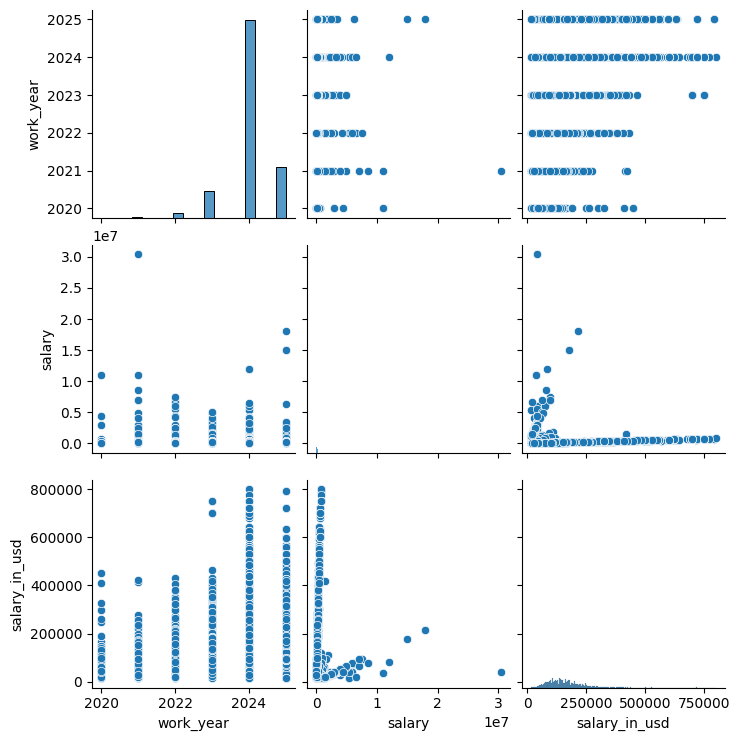

In [9]:
plot = sns.pairplot(data=df)
plt.show()

Because there are now only three numeric columns (since I converted worksite from numeric to ordinal), there is not much to see on the correlation matrix. salary and salary_in_usd should be corelated because they are directly proportional conversions. work_year and salary seem to have a slight positive correlation. This makes sense because salaries tend to go up slightly each year.

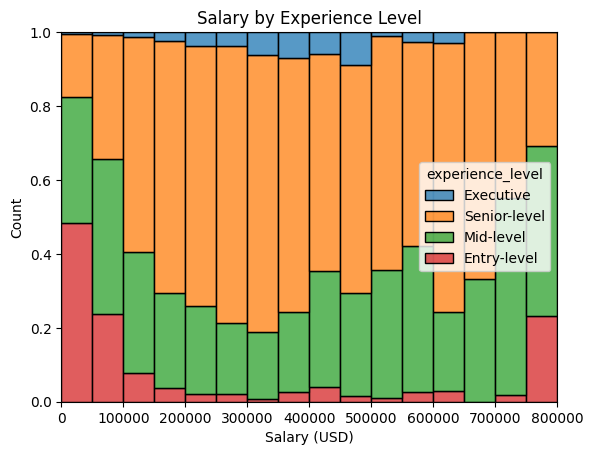

In [10]:
plot = sns.histplot(data=df, x='salary_in_usd', hue='experience_level', binrange=(0,800000), binwidth=50000, multiple='fill', hue_order=['Executive', 'Senior-level', 'Mid-level', 'Entry-level'])
plt.title('Salary by Experience Level')
plt.xlabel('Salary (USD)')
plt.show()

This graph represents the salary (in usd) and how each bin breaks down based on experience level. The color in each bar represents what percent of the salaries in that bin are for that particular experience level. We would expect entry level salaries to be the least, followed by mid-level, senior-level, then executive. This graph mostly proves that hypothesis correct, but there are some notable exceptions. The highest bin, $750-800k, shows a spike in entry-level records. This could be caused by an outlier or only having a few records in each bin. Senior-level jobs also seem to have a higher maximum than executive roles.

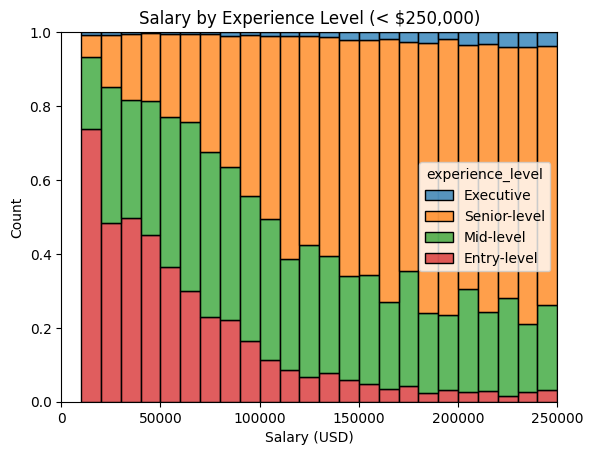

In [11]:
# zoom into < $250,000 range

plot = sns.histplot(data=df, x='salary_in_usd', hue='experience_level', binrange=(0,250000), binwidth=10000, multiple='fill', hue_order=['Executive', 'Senior-level', 'Mid-level', 'Entry-level'])
plt.title('Salary by Experience Level (< $250,000)')
plt.xlabel('Salary (USD)')
plt.show()

This plot is just a zoomed in version of the above plot, focusing on salaries less than 250k.

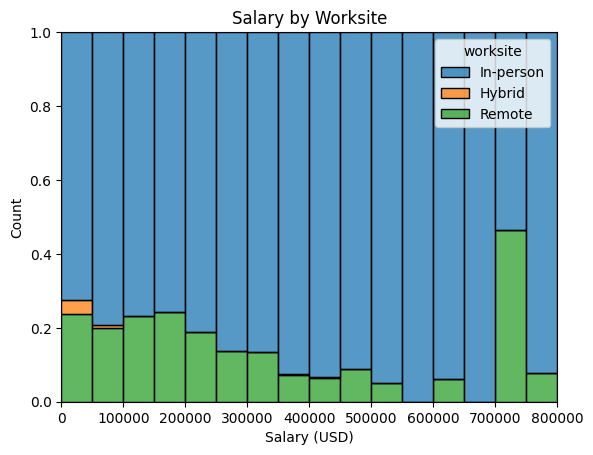

In [12]:
plot = sns.histplot(data=df, x='salary_in_usd', hue='worksite', binrange=(0,800000), binwidth=50000, multiple='fill')
plt.title('Salary by Worksite')
plt.xlabel('Salary (USD)')
plt.show()

This plot highlights the distribution of worksite based on salaries. Hybrid roles most notably appear in the lowest bin, indicating that they may make less than full in-person or full remote workers. In-person workers also appear to make slightly more than remote workers. The 700-750k bracket seems to be an outlier, likely caused by so few records making it into the bin.

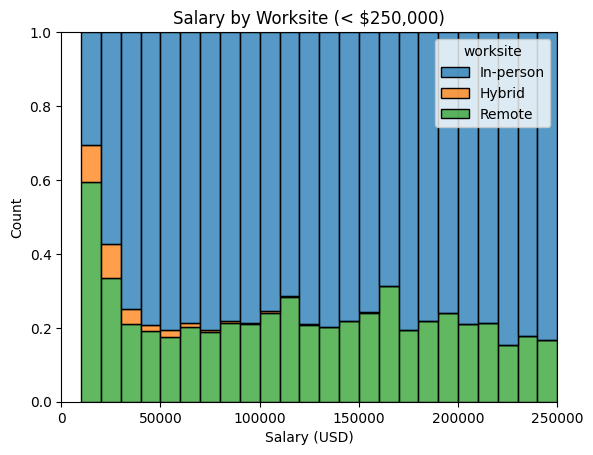

In [13]:
plot = sns.histplot(data=df, x='salary_in_usd', hue='worksite', binrange=(0,250000), binwidth=10000, multiple='fill')
plt.title('Salary by Worksite (< $250,000)')
plt.xlabel('Salary (USD)')
plt.show()

This plot is just a zoomed in version of the above plot, focusing on salaries less than 250k.

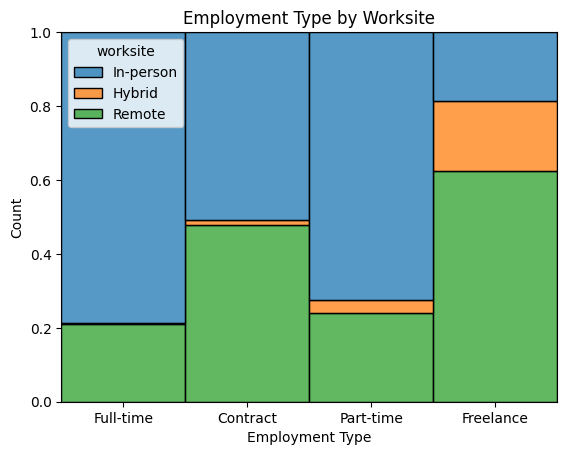

In [14]:
plot = sns.histplot(data=df, x='employment_type', hue='worksite', multiple='fill')
plt.title('Employment Type by Worksite')
plt.xlabel('Employment Type')
plt.show()

This plot highlights the employment type by worksite. Full-time jobs are the most likely to be in-person, followed by part-time, contract, then freelance. Freelance jobs by far have the highest percentage of hybrid worksites. Nearly half of all contract jobs are remote, while only 20-25% of full-time and part-time roles are remote. 

In [15]:
job_title_words = dict()
for job_title in df['job_title']:
    for word in job_title.strip().lower().split(' '):
        job_title_words[word] = job_title_words.get(word, 0) + 1

I tried analyzing the job_title column by breaking it down into keywords.

In [16]:
# *** The following code was generated by AI and slightly modified

top_keywords_and_vals = sorted(job_title_words.items(), key=lambda x: x[1], reverse=True)
top_keywords, top_keyword_vals = zip(*top_keywords_and_vals)
top_keywords = list(top_keywords)
top_keyword_vals = list(top_keyword_vals)
top_keyword_percents = [_/len(df) for _ in top_keyword_vals]
print(top_keywords[0:5])
print(top_keyword_percents[0:5])

['engineer', 'data', 'scientist', 'analyst', 'software']
[0.45193262891718594, 0.43857807278966854, 0.20539826605256029, 0.1472726451729432, 0.11901697823534724]


Engineer, data, scientist, analyst, and software are the top five most frequent key words. Engineer and data appear in over 40% of job titles, followed by a significant jump to scientist, only appearing in 20% of records.

In [17]:
sal_by_keyword = pd.DataFrame()
sal_by_keyword['keyword'] = top_keywords
sal_by_keyword['percent'] = top_keyword_percents
salaries = []
for keyword in sal_by_keyword['keyword']:
    filtered_df = df[df['job_title'].str.contains(keyword, case=False)]
    med_sal = filtered_df['salary_in_usd'].median()
    salaries.append(med_sal)
sal_by_keyword['med_salary'] = salaries
print(sal_by_keyword.head())

     keyword   percent  med_salary
0   engineer  0.451933    164000.0
1       data  0.438578    130000.0
2  scientist  0.205398    159100.0
3    analyst  0.147273    100000.0
4   software  0.119017    178250.0


Generating the median salary (in USD) for each job title keyword.

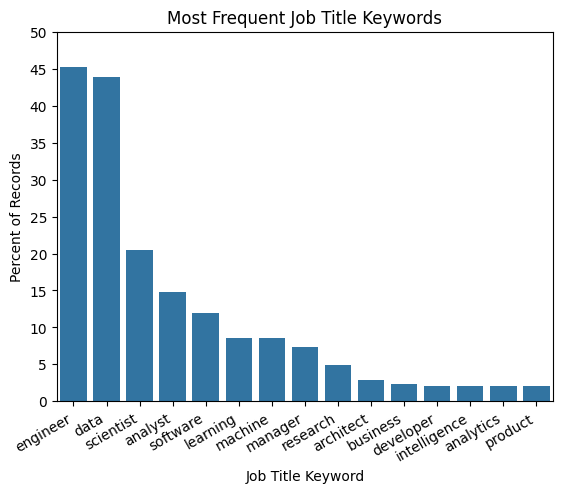

In [23]:
most_frequent = sal_by_keyword.sort_values(by='percent', ascending=False).head(15)
plot = sns.barplot(x=most_frequent['keyword'], y=most_frequent['percent'] * 100)
plt.title("Most Frequent Job Title Keywords")
plt.ylabel("Percent of Records")
plt.yticks(ticks=range(0, 51, 5))
plt.xlabel("Job Title Keyword")
plt.xticks(rotation=30, ha="right")
plt.show()

As stated earlier, engineer and data are the most common job title keywords.

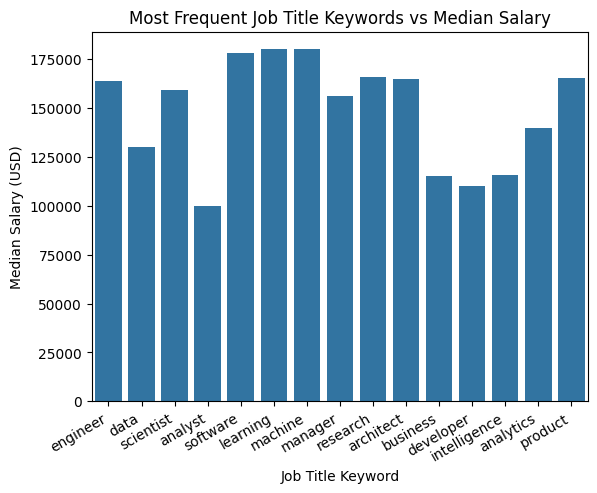

In [21]:
plot = sns.barplot(data=most_frequent, x='keyword', y='med_salary')
plt.title("Most Frequent Job Title Keywords vs Median Salary")
plt.ylabel("Median Salary (USD)")
plt.xlabel("Job Title Keyword")
plt.xticks(rotation=30, ha="right")
plt.show()

This plot highlights the median salary based on the most frequent job title keywords. This data is very interesting and indicates that the job_title feature may offer valuable information if we use it to create synthetic features such as having keywords. Roles having software, learning, and machine have a median salary around $175k, while roles having analyst, business, or developer have a median just above $100k.

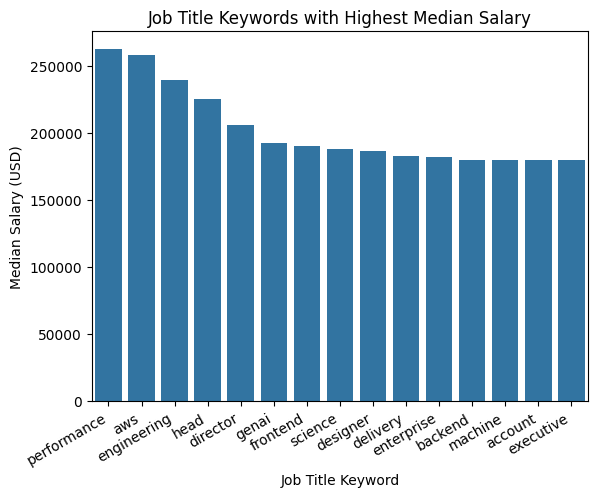

In [22]:
highest_paying = sal_by_keyword.sort_values(by='med_salary', ascending=False).head(15)
plot = sns.barplot(data=highest_paying, x='keyword', y='med_salary')
plt.title("Job Title Keywords with Highest Median Salary")
plt.ylabel("Median Salary (USD)")
plt.xlabel("Job Title Keyword")
plt.xticks(rotation=30, ha="right")
plt.show()

This plot is similar to the above graph, but sorts the keywords based on highest median salary as opposed to frequency in the dataset. performance and aws both have a median salary above $250k.